In [12]:
words = open("names.txt").read().splitlines()
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [13]:
len(words)

32033

In [14]:
min([len(w) for w in words])

2

In [16]:
max([len(w) for w in words])

15

In [27]:
b = dict()
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram =(ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1 # , 0 if bigram is not in dictionary


In [32]:
sorted(b.items(), key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [33]:
import torch

In [34]:
N = torch.zeros((28,28), dtype=torch.int32)

In [40]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
print(stoi)

itos = {i:s for s,i in stoi.items()}
print(itos)


{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


In [37]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

print(N)

tensor([[ 1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,   350,
          1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,  1374,
           762,  1668,   322,   364,  4100,   870,     0, 13280],
        [  642,    76,     2,   130,  1310,     0,     0,    82,   434,     2,
             0,   206,     0,     8,   210,     0,     0,  1684,    16,     4,
            90,     0,     0,     0,   166,     0,     0,   228],
        [ 1630,     0,    84,     2,  1102,     0,     4,  1328,   542,     6,
           632,   232,     0,     0,   760,     2,    22,   152,    10,    70,
            70,     0,     0,     6,   208,     8,     0,   194],
        [ 2606,     2,     6,   298,  2566,    10,    50,   236,  1348,    18,
             6,   120,    60,    62,   756,     0,     2,   848,    58,     8,
           184,    34,    46,     0,   634,     2,     0,  1032],
        [ 1358,   242,   306,   768,  2542,   164,   250,   304,  1636,   110,
           356,  6496,  1

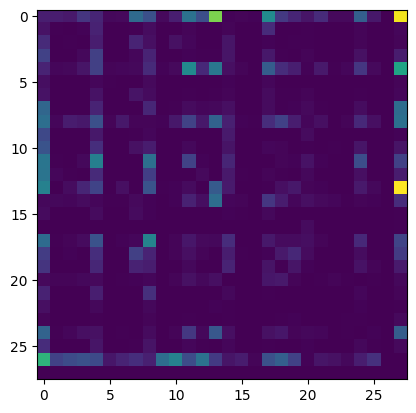

In [38]:
import matplotlib.pyplot as plt
plt.imshow(N)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


(-0.5, 27.5, 27.5, -0.5)

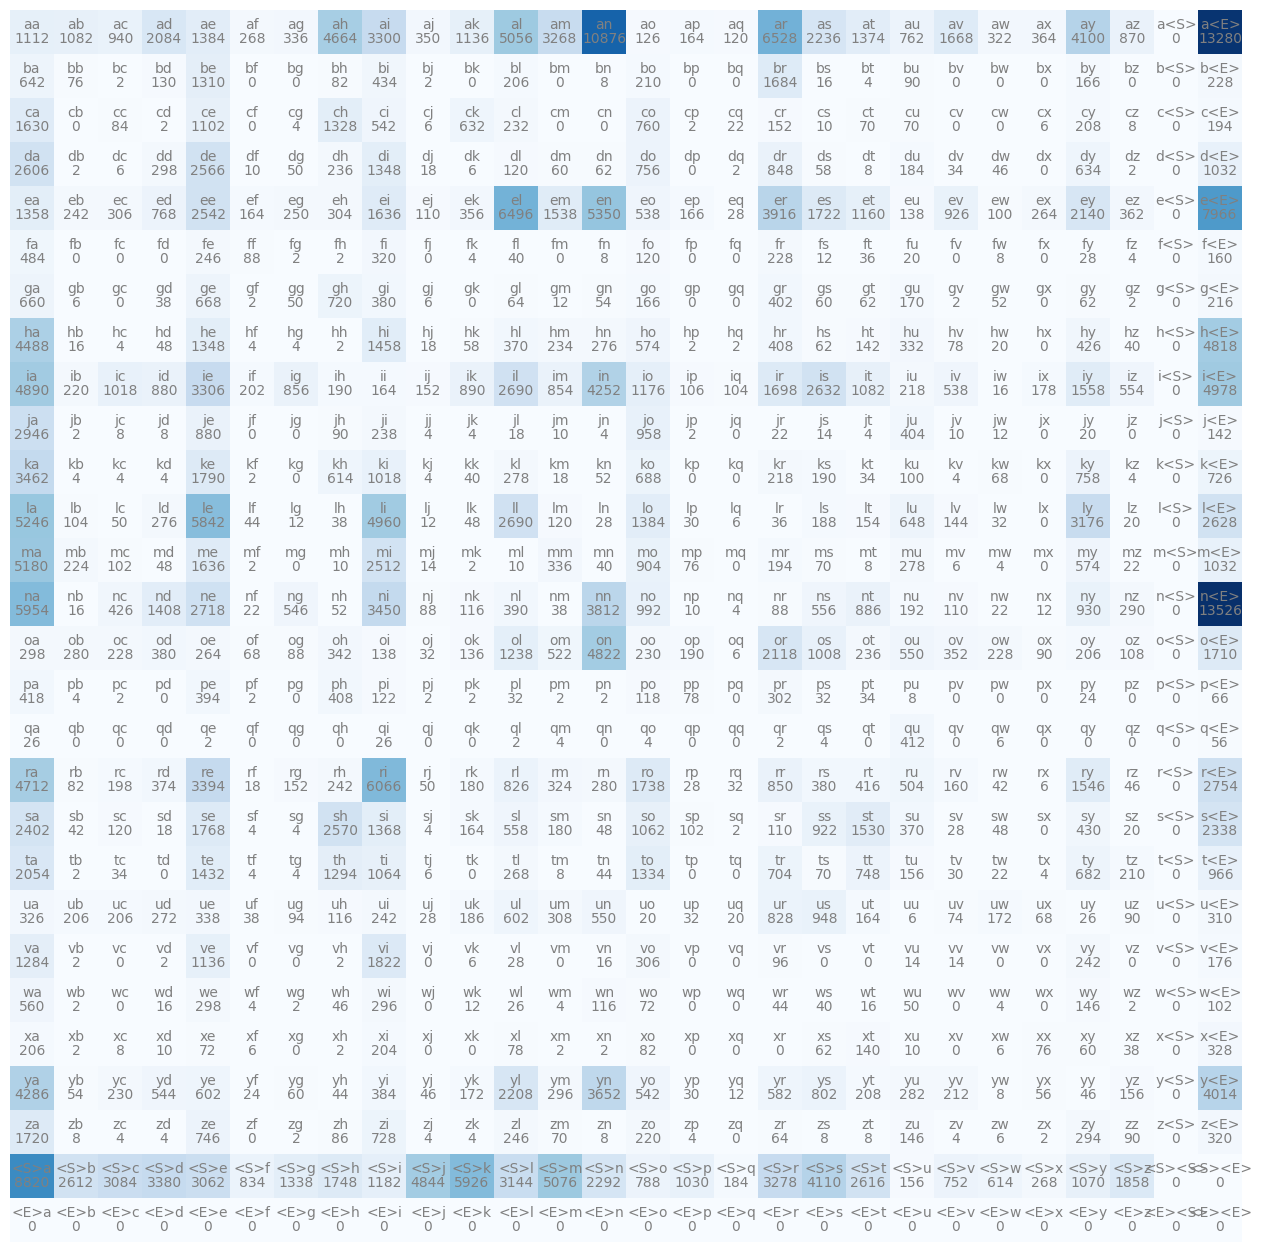

In [47]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

Fixing the \<S> and \<E> as one character. Changing N to a 27x27 matrix

In [48]:
N = torch.zeros((27,27), dtype=torch.int32)

In [56]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [58]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


(-0.5, 26.5, 26.5, -0.5)

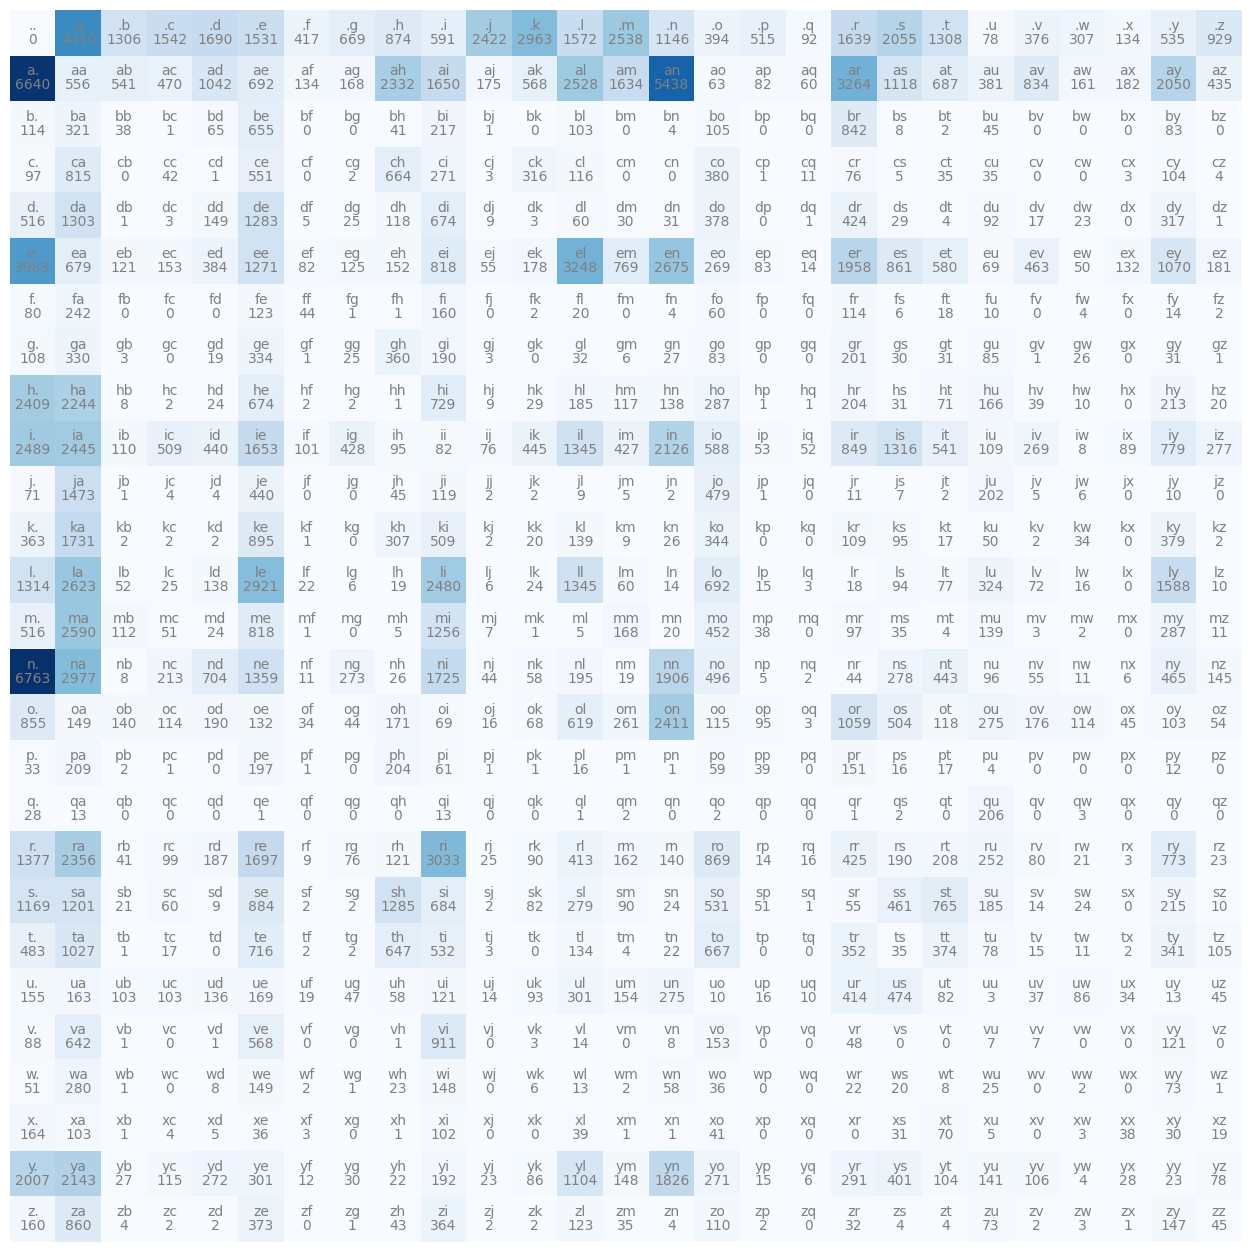

In [60]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [83]:
p = N[0,:].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [122]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix = 13
itos[ix]

'm'

In [185]:
P = (N+1).float() 
P /= P.sum(1, keepdim=True)


In [186]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


junide.
janasah.
p.
cony.
a.


Creating a loss function aka negative log likelihood function

In [188]:
g = torch.Generator().manual_seed(2147483647)
log_likelihood = 0.0
n = 0 

# for w in words[:3]:
for w in ["andrej"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob 
        n += 1
        print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

.a:  0.1376 -1.9835
an:  0.1604 -1.8302
nd:  0.0384 -3.2594
dr:  0.0770 -2.5646
re:  0.1334 -2.0143
ej:  0.0027 -5.9004
jq:  0.0003 -7.9817
qs:  0.0100 -4.6018
sd:  0.0012 -6.7011
df:  0.0011 -6.8249
fq:  0.0011 -6.8373
q.:  0.0970 -2.3331
log_likelihood=tensor(-52.8324)
nll=tensor(52.8324)
nll/n=tensor(4.4027)


Sampling from probability distribution using Torch.multinomial
To make things deterministic, we use torch.generator

In [80]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.6064, 0.3033, 0.0903])

In [81]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])